In [1]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
%matplotlib inline

## Mortgage Loan amount

Let us assume,
- the cost of purchase of the home, **home_cost = INR 75,00,000**

- percent of your contribution, **down_payment_pct = 20% or 0.2**

- defining variables, to calculate the Home / Mortgage Loan **mortgage_loan_amt**


In [2]:
home_cost = 7500000
down_payment_pct = 0.2

#Down payment amount in INR

down_payment_amt = home_cost *down_payment_pct

#Amount of Home / Mortgage Loan

mortgage_loan_amt= home_cost -down_payment_amt   

print(f"Own Contribution/ Down Payment for the home is : {down_payment_amt}\n")
print (f"Mortgage Loan amount to be availed from the bank is : {mortgage_loan_amt}")

Own Contribution/ Down Payment for the home is : 1500000.0

Mortgage Loan amount to be availed from the bank is : 6000000.0


## Interest Rate 

Assume, 
-  Rate of interest offered by the bank,  **interest_rate_annual = 7 % p.a**

    **$ R_{Periodic} = (1 + R_{Annual} )^{1/N}-1  $**

     Here, interest_rate_annual or $R_{Annual}$ (as above) is 7 % or 0.07.
     
- Mortagage Loan tenure or total period of loan repayment, **loan_tenure is 20 years**  

We need to calculate 
- $R_{Periodic}$ (here period is monthly,) **interest_rate_monthly**

- **N** or number of periods here is 12 (months in a year)

- **Monthly installment or EMI - emi_amount** 

In [3]:
# Monthly Interest Rate
interest_rate_monthly = ((1 + 0.07)**(1/12))- 1

#Total Repayment Period
loan_tenure = 20*12

#EMI or Monthly Installment

emi_amount = -1*npf.pmt(interest_rate_monthly, loan_tenure,mortgage_loan_amt)

print(f"EMI for a loan amount of INR {mortgage_loan_amt} for {loan_tenure} months  :INR {round(emi_amount,2)}")

EMI for a loan amount of INR 6000000.0 for 240 months  :INR 45746.69


## EMI amount or Monthly installments 

have two components that varies over the loan tenure (EMI remains same through out)
- **Interest Payment**
- **Principal Payment**

Let's find out the **Principal payment(principal_paid), Interest payment(interest_paid)** for the First month installment.


In [4]:
# 1st EMI : Interest paid component
first_month_interest_paid  = mortgage_loan_amt * interest_rate_monthly

print(f"First Month Interest Component: {round(first_month_interest_paid,2)}")

# 1st EMI : Principal paid component
first_month_principal_paid = emi_amount - first_month_interest_paid

print(f"First Month Principal Component:{round(first_month_principal_paid,2)} \nEMI amount : {round(emi_amount,2)}")

First Month Interest Component: 33924.87
First Month Principal Component:11821.81 
EMI amount : 45746.69


In [5]:
#Check if both component add up to the calculated EMI as above :

33924.87 + 11821.81

45746.68

## Simulating monthly installments for the entire tenure

We need to replicate the above calculation for the loan tenure - **240 installments** (ie., 20 years *12 months)

In [6]:
#Use a FOR Loop through the loan tenure or period and store the values in an array

principal_remaining = np.zeros(loan_tenure)
interest_paid = np.zeros(loan_tenure)
principal_paid= np.zeros(loan_tenure)

for i in range(0, loan_tenure):
    
    # For first EMI
    if i == 0:
        previous_principal_remaining = mortgage_loan_amt
    else:
        previous_principal_remaining = principal_remaining[i-1]
        
    # Calculate the interest and principal payments
    interest_payment = round(previous_principal_remaining*interest_rate_monthly, 2)
    principal_payment = round(emi_amount - interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
        
    # Collect the values in an array
    interest_paid[i] = interest_payment
    principal_paid[i] = principal_payment
    principal_remaining[i] = previous_principal_remaining - principal_payment
    
    # Print the payments for the first few periods
    print(f"EMI no. {i+1}| Interest Paid :{interest_payment} | Principal Paid {principal_payment} | Principal Remaining {np.round(principal_remaining[i],2)}")

EMI no. 1| Interest Paid :33924.87 | Principal Paid 11821.82 | Principal Remaining 5988178.18
EMI no. 2| Interest Paid :33858.03 | Principal Paid 11888.66 | Principal Remaining 5976289.52
EMI no. 3| Interest Paid :33790.81 | Principal Paid 11955.88 | Principal Remaining 5964333.64
EMI no. 4| Interest Paid :33723.21 | Principal Paid 12023.48 | Principal Remaining 5952310.16
EMI no. 5| Interest Paid :33655.23 | Principal Paid 12091.46 | Principal Remaining 5940218.7
EMI no. 6| Interest Paid :33586.86 | Principal Paid 12159.83 | Principal Remaining 5928058.87
EMI no. 7| Interest Paid :33518.11 | Principal Paid 12228.58 | Principal Remaining 5915830.29
EMI no. 8| Interest Paid :33448.96 | Principal Paid 12297.73 | Principal Remaining 5903532.56
EMI no. 9| Interest Paid :33379.43 | Principal Paid 12367.26 | Principal Remaining 5891165.3
EMI no. 10| Interest Paid :33309.51 | Principal Paid 12437.18 | Principal Remaining 5878728.12
EMI no. 11| Interest Paid :33239.18 | Principal Paid 12507.51

## Converting into a DATAFRAME

In [7]:
import pandas as pd

principal = pd.Series(principal_paid)
interest = pd.Series(interest_paid)
principal_remain = pd.Series(principal_remaining)
EMI = pd.Series(np.ones(loan_tenure)*(round(emi_amount,2)))
EMI_num = pd.Series(np.arange(1,loan_tenure+1))

In [8]:
loan_calculator = pd.concat([EMI_num,EMI,principal,interest,principal_remain], axis=1, 
    keys=["EMI no.","EMI amount","Principal Payment","Interest Payment", "Principal Remaining"]).set_index("EMI no.")

Alternatively, **pd.DataFrame()** can be used.

In [9]:
loan_calculator

,EMI amount,Principal Payment,Interest Payment,Principal Remaining
EMI no.,,,,
1,45746.69,11821.82,33924.87,5988178.18
2,45746.69,11888.66,33858.03,5976289.52
3,45746.69,11955.88,33790.81,5964333.64
4,45746.69,12023.48,33723.21,5952310.16
5,45746.69,12091.46,33655.23,5940218.70
...,...,...,...,...
236,45746.69,44475.06,1271.63,180426.64
237,45746.69,44726.53,1020.16,135700.11
238,45746.69,44979.42,767.27,90720.69


# Visualize the monthly interest & principal payment during loan tenure

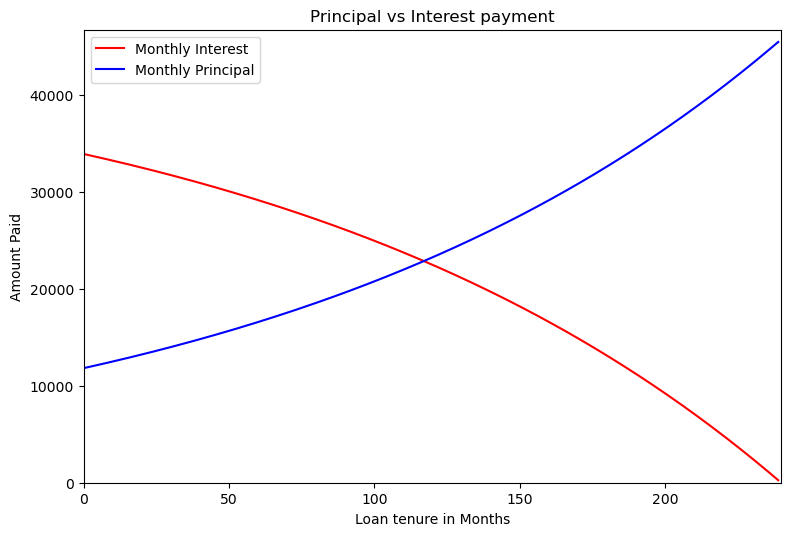

In [10]:
plt.figure(dpi =100, figsize =(9,6))
plt.plot(interest_paid, color="red")
plt.plot(principal_paid, color="blue")
plt.xlabel("Loan tenure in Months")
plt.ylabel("Amount Paid")
plt.xlim(0,loan_tenure)
plt.ylim(0,emi_amount+1000)
plt.legend (["Monthly Interest", "Monthly Principal"], loc =2)
plt.title("Principal vs Interest payment");

## Visualize the CUMULATIVE interest & principal payment during loan tenure

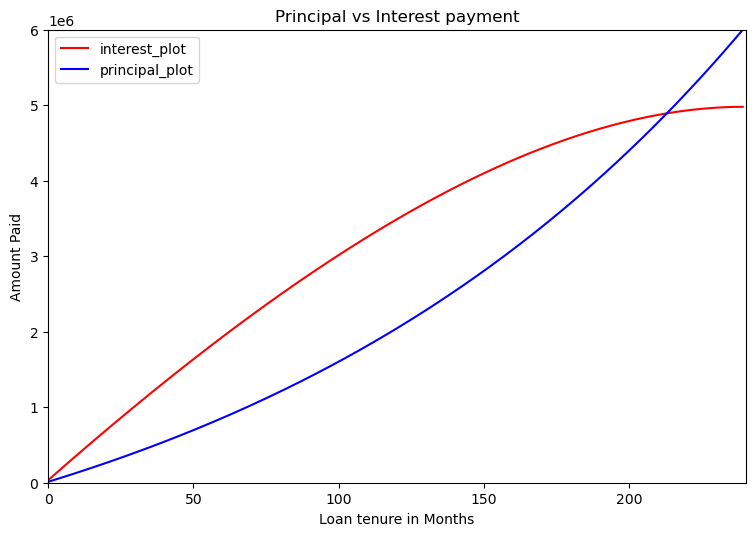

In [11]:

cumulative_principal_paid = np.cumsum((principal_paid))
cumulative_interest_paid = np.cumsum(np.array(interest_paid))

plt.figure(dpi =100, figsize =(9,6))
plt.xlabel("Loan tenure in Months")
plt.ylabel("Amount Paid")
plt.xlim(0,loan_tenure)
plt.ylim(0,mortgage_loan_amt)
plt.title("Principal vs Interest payment");
plt.plot(cumulative_interest_paid, color='red')
plt.plot(cumulative_principal_paid, color='blue')
plt.legend(["interest_plot", "principal_plot"], loc=2)
plt.show()

## Calculate your percentage home equity(ownership) over loan tenure

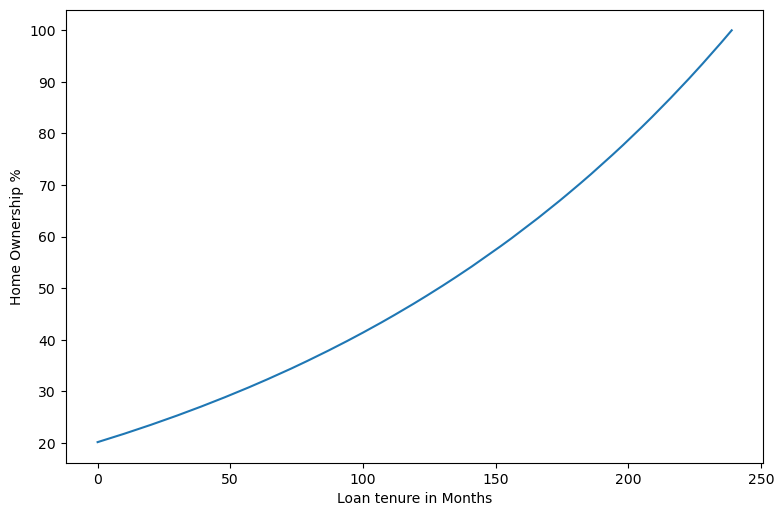

In [12]:
cumulative_percent_owned = np.round((down_payment_pct + (cumulative_principal_paid/home_cost))*100,2)
plt.figure(dpi =100, figsize =(9,6))
plt.xlabel("Loan tenure in Months")
plt.ylabel("Home Ownership %")

plt.plot(cumulative_percent_owned);